In [192]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [193]:
#Displaying the dataset
df = pd.read_csv("Loan.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [194]:

class_count_Y, class_count_N = df['Loan_Status'].value_counts()

# Separate class
class_Y = df[df['Loan_Status'] == "Y"]
class_N = df[df['Loan_Status'] == 'N']# print the shape of the class
print('class Y:', class_Y.shape)
print('class N:', class_N.shape)

class Y: (422, 13)
class N: (192, 13)


In [195]:
class_Y_under = class_Y.sample(class_count_N)

test_under = pd.concat([class_Y_under, class_N], axis=0)

print("total class of Y and N:",test_under['Loan_Status'].value_counts())


total class of Y and N: Y    192
N    192
Name: Loan_Status, dtype: int64


In [196]:
#Dropping irrelevant column
df= df.drop(['Loan_ID'], axis=1)

In [197]:
#Finding out the data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [198]:
#Finding out useful information
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [199]:
#Removing the null values
df = df.dropna()
print(df)

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
5      Male     Yes          2      Graduate           Yes             5417   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

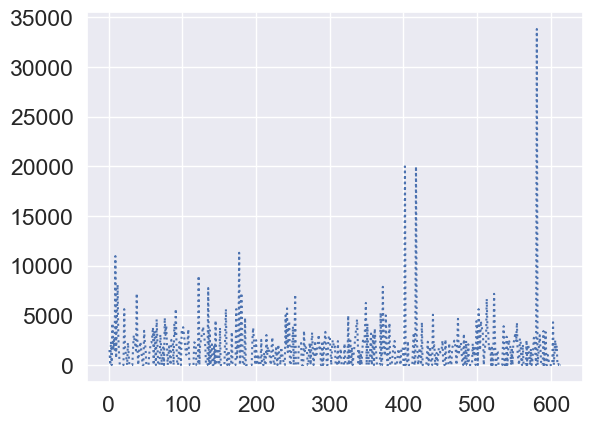

In [200]:
#Detecting outlier values for Age variable through plotting
plt.plot(df["CoapplicantIncome"], linestyle = 'dotted')
plt.show()

In [201]:
#Removing Outliers
df.drop(df[df["CoapplicantIncome"] > 15000].index,inplace=True)

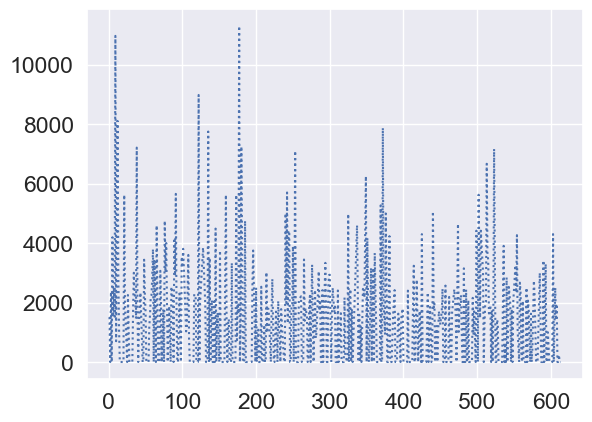

In [202]:
#Plotting again to see the difference between the graphs, before and after removing the outliers.
plt.plot(df["CoapplicantIncome"], linestyle = 'dotted')
plt.show()

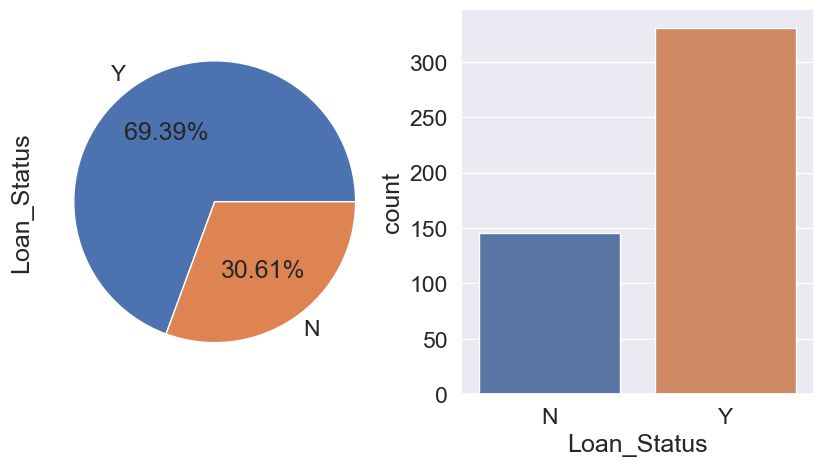

In [203]:
#Fidning out the distribution of "Loan_Status" through visualization
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
df['Loan_Status'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.subplot(1,2,2)
sns.countplot(x = 'Loan_Status', data = df)
plt.show()

In [204]:
#Converting string to numeric
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Property_Area'] = df['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban':2})
df['Dependents'] = df['Dependents'].map({'0': 0,'1': 1,'2': 2, '3+': 3})

print("Modified dataframe:\n",df)

Modified dataframe:
      Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1           1          1              0             4583   
2         1        1           0          1              1             3000   
3         1        1           0          0              0             2583   
4         1        0           0          1              0             6000   
5         1        1           2          1              1             5417   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          1              0             2900   
610       1        1           3          1              0             4106   
611       1        1           1          1              0             8072   
612       1        1           2          1              0             7583   
613       0        0           0          1              1             4583   

     CoapplicantIncome  LoanAm

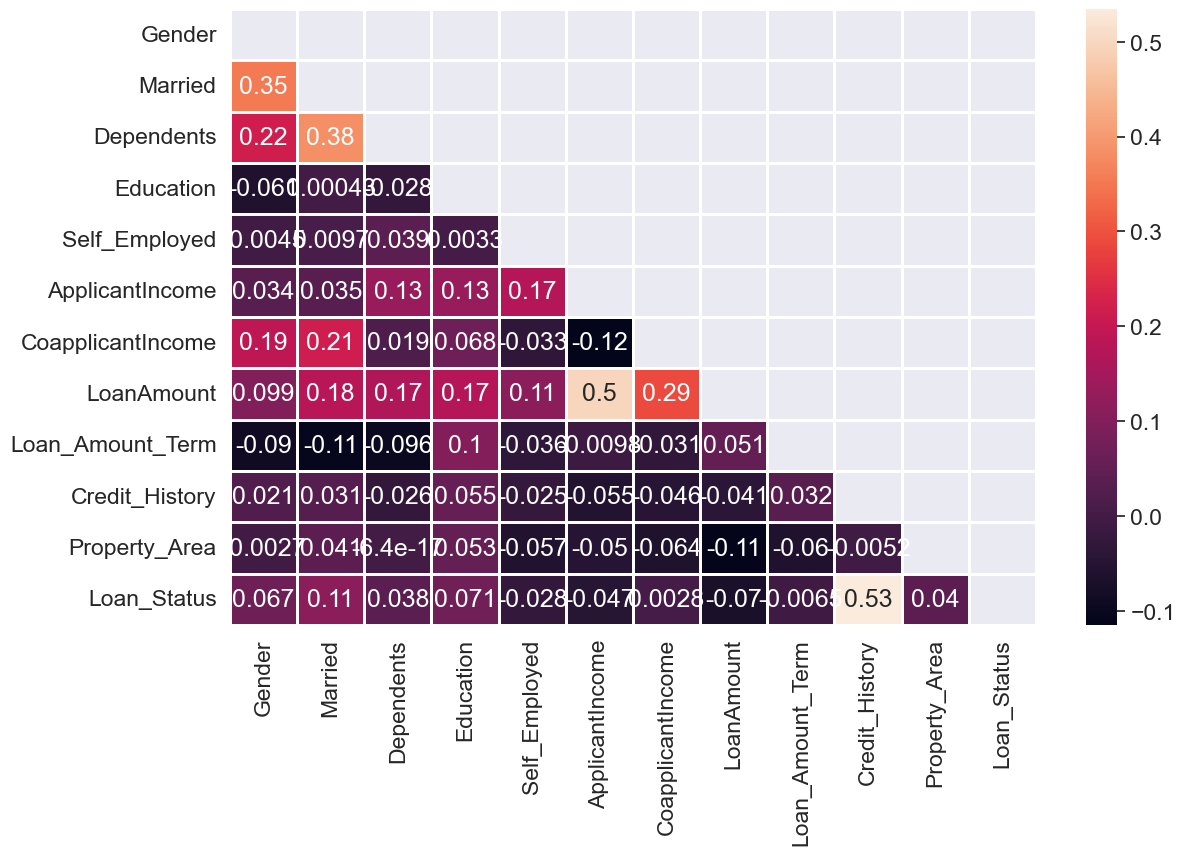

In [205]:
#Finding the correlation using heatmap
plt.figure(figsize=(13, 8))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket");


<AxesSubplot:xlabel='Gender', ylabel='count'>

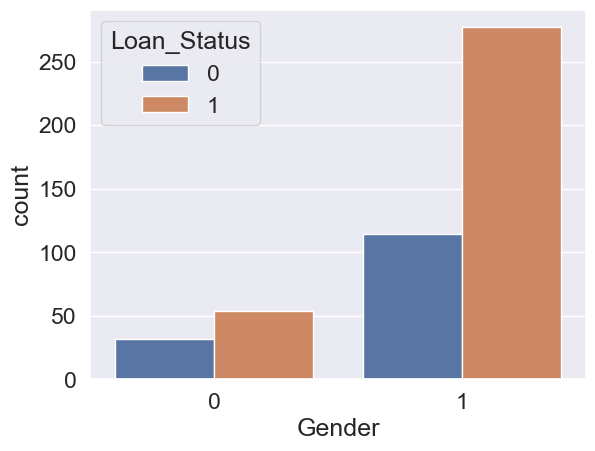

In [206]:
#Now comparing "Loan_Status" with few other variables
sns.countplot(x='Gender',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

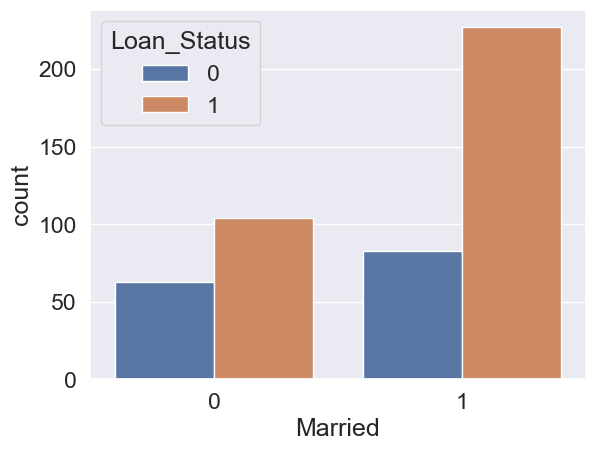

In [207]:
sns.countplot(x='Married',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Education', ylabel='count'>

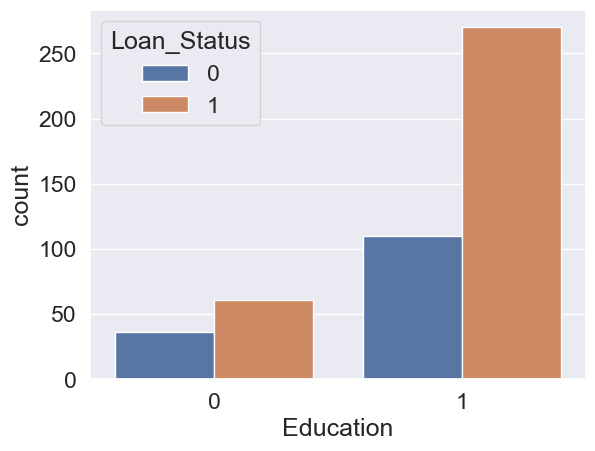

In [208]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

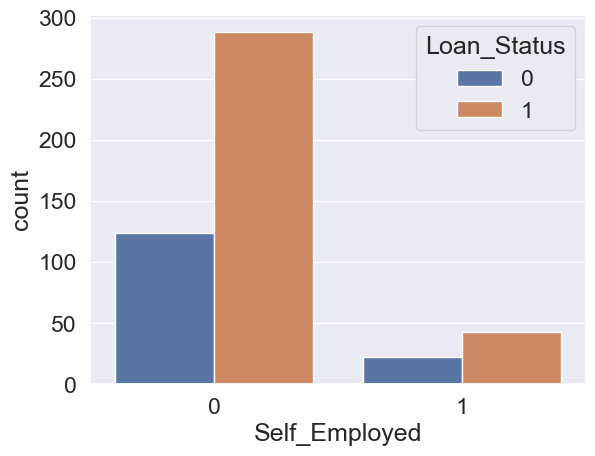

In [209]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

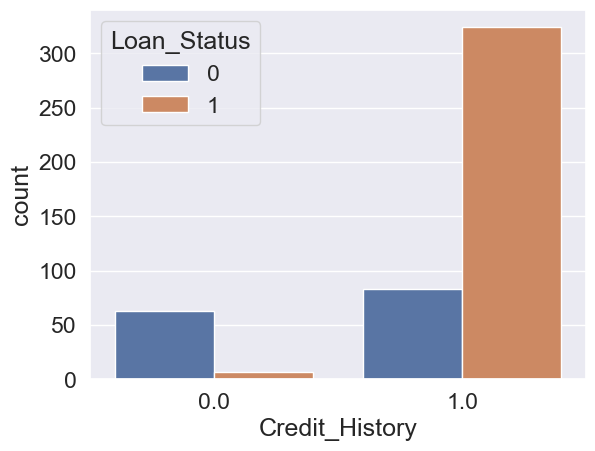

In [210]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

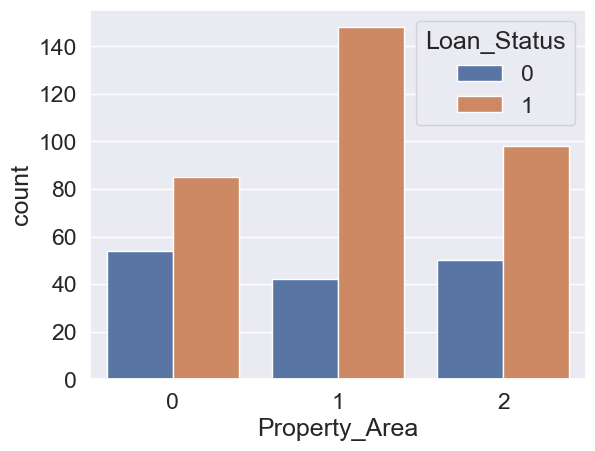

In [211]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

In [212]:
#Scaling features and separating them from target

# importing the scaler
from sklearn.preprocessing import StandardScaler

# creating a copy of dfframe
df1 = df
col_cols = list(df1.columns)

# removing the target variable from the columns list
col_cols.pop() 

# separating the features and target 
#df1['Credit_History', 'LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term','Dependents']
X = df1[['Credit_History', 'LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term','Dependents']]
XX  = X
Y = df1[['Loan_Status']]



In [213]:
# instantiating the scaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
print("The first 5 rows of X are")


The first 5 rows of X are


In [214]:
X

array([[ 0.41471698, -0.20795196, -0.14144753,  0.03976459,  0.27647271,
         0.21782682],
       [ 0.41471698, -0.97814246, -0.42045652, -0.79590331,  0.27647271,
        -0.76239386],
       [ 0.41471698, -0.30733138, -0.49395415,  0.51079756,  0.27647271,
        -0.76239386],
       ...,
       [ 0.41471698,  1.34485148,  0.47350027, -0.66290576,  0.27647271,
         0.21782682],
       [ 0.41471698,  0.52497127,  0.3873124 , -0.79590331,  0.27647271,
         1.1980475 ],
       [-2.411283  , -0.14583982, -0.14144753, -0.79590331,  0.27647271,
        -0.76239386]])

In [215]:
#Splitting into train & test
from sklearn.model_selection import train_test_split
from termcolor import colored
X_train, X_test, y_train, y_test = train_test_split(X,Y , test_size = 0.1,stratify=Y, random_state = 42)
print(f"The shape of X_train is      {colored(X_train.shape,'yellow')}")
print(f"The shape of X_test is       {colored(X_test.shape,'yellow')}")
print(f"The shape of y_train is      {colored(y_train.shape,'yellow')}")
print(f"The shape of y_test is       {colored(y_test.shape,'yellow')}")

The shape of X_train is      (429, 6)
The shape of X_test is       (48, 6)
The shape of y_train is      (429, 1)
The shape of y_test is       (48, 1)


In [216]:
scaler = StandardScaler()
XX = scaler.fit(XX)

In [217]:
XX

StandardScaler()

In [218]:
import warnings
import pickle
warnings.filterwarnings("ignore")
pickle.dump(scaler,open('scaler.pkl','wb'))
scaler=pickle.load(open('scaler.pkl','rb'))

In [219]:
#Finding out the importance of features
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

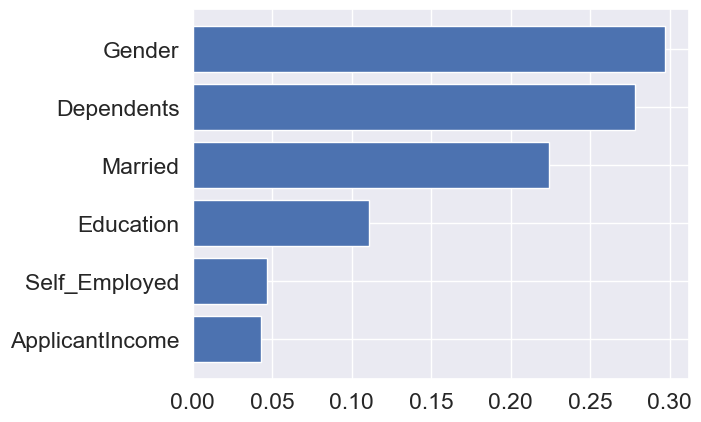

In [220]:
f_i = list(zip(col_cols,rf.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.show()

In [221]:
# #Selecting features after dimensionality reduction and training them
# X_train= X_train[['Credit_History', 'LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term','Dependents']]
# X_train.head(5)


In [222]:
# #Testing the features + Validation
# X_test= X_test[['Credit_History', 'LoanAmount', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term','Dependents']]
# X_test.head(20)

In [223]:
X_train.shape

(429, 6)

In [224]:
#1st Model
# define the model
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier()

# define a grid of parameters
param_grid = {'criterion':['gini','entropy'],
              'splitter':['best','random'],
              'max_depth':[2,3,4,5,6,7,8],
              'max_features':['auto','sqrt','log2'],
             }

# initialize grid search
model1 = GridSearchCV(
estimator=classifier, param_grid=param_grid, scoring="accuracy", verbose=10,
n_jobs=1,
cv=5 )

# fit the model and extract best score
model1.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV 1/5; 1/84] START criterion=gini, max_depth=2, max_features=auto, splitter=best
[CV 1/5; 1/84] END criterion=gini, max_depth=2, max_features=auto, splitter=best;, score=0.709 total time=   0.0s
[CV 2/5; 1/84] START criterion=gini, max_depth=2, max_features=auto, splitter=best
[CV 2/5; 1/84] END criterion=gini, max_depth=2, max_features=auto, splitter=best;, score=0.814 total time=   0.0s
[CV 3/5; 1/84] START criterion=gini, max_depth=2, max_features=auto, splitter=best
[CV 3/5; 1/84] END criterion=gini, max_depth=2, max_features=auto, splitter=best;, score=0.721 total time=   0.0s
[CV 4/5; 1/84] START criterion=gini, max_depth=2, max_features=auto, splitter=best
[CV 4/5; 1/84] END criterion=gini, max_depth=2, max_features=auto, splitter=best;, score=0.674 total time=   0.0s
[CV 5/5; 1/84] START criterion=gini, max_depth=2, max_features=auto, splitter=best
[CV 5/5; 1/84] END criterion=gini, max_depth=2, max_features=auto, 

[CV 2/5; 11/84] END criterion=gini, max_depth=3, max_features=log2, splitter=best;, score=0.837 total time=   0.0s
[CV 3/5; 11/84] START criterion=gini, max_depth=3, max_features=log2, splitter=best
[CV 3/5; 11/84] END criterion=gini, max_depth=3, max_features=log2, splitter=best;, score=0.709 total time=   0.0s
[CV 4/5; 11/84] START criterion=gini, max_depth=3, max_features=log2, splitter=best
[CV 4/5; 11/84] END criterion=gini, max_depth=3, max_features=log2, splitter=best;, score=0.826 total time=   0.0s
[CV 5/5; 11/84] START criterion=gini, max_depth=3, max_features=log2, splitter=best
[CV 5/5; 11/84] END criterion=gini, max_depth=3, max_features=log2, splitter=best;, score=0.671 total time=   0.0s
[CV 1/5; 12/84] START criterion=gini, max_depth=3, max_features=log2, splitter=random
[CV 1/5; 12/84] END criterion=gini, max_depth=3, max_features=log2, splitter=random;, score=0.709 total time=   0.0s
[CV 2/5; 12/84] START criterion=gini, max_depth=3, max_features=log2, splitter=random

[CV 2/5; 23/84] END criterion=gini, max_depth=5, max_features=log2, splitter=best;, score=0.826 total time=   0.0s
[CV 3/5; 23/84] START criterion=gini, max_depth=5, max_features=log2, splitter=best
[CV 3/5; 23/84] END criterion=gini, max_depth=5, max_features=log2, splitter=best;, score=0.709 total time=   0.0s
[CV 4/5; 23/84] START criterion=gini, max_depth=5, max_features=log2, splitter=best
[CV 4/5; 23/84] END criterion=gini, max_depth=5, max_features=log2, splitter=best;, score=0.826 total time=   0.0s
[CV 5/5; 23/84] START criterion=gini, max_depth=5, max_features=log2, splitter=best
[CV 5/5; 23/84] END criterion=gini, max_depth=5, max_features=log2, splitter=best;, score=0.741 total time=   0.0s
[CV 1/5; 24/84] START criterion=gini, max_depth=5, max_features=log2, splitter=random
[CV 1/5; 24/84] END criterion=gini, max_depth=5, max_features=log2, splitter=random;, score=0.826 total time=   0.0s
[CV 2/5; 24/84] START criterion=gini, max_depth=5, max_features=log2, splitter=random

[CV 5/5; 33/84] END criterion=gini, max_depth=7, max_features=sqrt, splitter=best;, score=0.729 total time=   0.0s
[CV 1/5; 34/84] START criterion=gini, max_depth=7, max_features=sqrt, splitter=random
[CV 1/5; 34/84] END criterion=gini, max_depth=7, max_features=sqrt, splitter=random;, score=0.860 total time=   0.0s
[CV 2/5; 34/84] START criterion=gini, max_depth=7, max_features=sqrt, splitter=random
[CV 2/5; 34/84] END criterion=gini, max_depth=7, max_features=sqrt, splitter=random;, score=0.860 total time=   0.0s
[CV 3/5; 34/84] START criterion=gini, max_depth=7, max_features=sqrt, splitter=random
[CV 3/5; 34/84] END criterion=gini, max_depth=7, max_features=sqrt, splitter=random;, score=0.756 total time=   0.0s
[CV 4/5; 34/84] START criterion=gini, max_depth=7, max_features=sqrt, splitter=random
[CV 4/5; 34/84] END criterion=gini, max_depth=7, max_features=sqrt, splitter=random;, score=0.826 total time=   0.0s
[CV 5/5; 34/84] START criterion=gini, max_depth=7, max_features=sqrt, spl

[CV 2/5; 44/84] END criterion=entropy, max_depth=2, max_features=auto, splitter=random;, score=0.837 total time=   0.0s
[CV 3/5; 44/84] START criterion=entropy, max_depth=2, max_features=auto, splitter=random
[CV 3/5; 44/84] END criterion=entropy, max_depth=2, max_features=auto, splitter=random;, score=0.721 total time=   0.0s
[CV 4/5; 44/84] START criterion=entropy, max_depth=2, max_features=auto, splitter=random
[CV 4/5; 44/84] END criterion=entropy, max_depth=2, max_features=auto, splitter=random;, score=0.849 total time=   0.0s
[CV 5/5; 44/84] START criterion=entropy, max_depth=2, max_features=auto, splitter=random
[CV 5/5; 44/84] END criterion=entropy, max_depth=2, max_features=auto, splitter=random;, score=0.765 total time=   0.0s
[CV 1/5; 45/84] START criterion=entropy, max_depth=2, max_features=sqrt, splitter=best
[CV 1/5; 45/84] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=best;, score=0.860 total time=   0.0s
[CV 2/5; 45/84] START criterion=entropy, max_dep

[CV 1/5; 59/84] END criterion=entropy, max_depth=4, max_features=log2, splitter=best;, score=0.872 total time=   0.0s
[CV 2/5; 59/84] START criterion=entropy, max_depth=4, max_features=log2, splitter=best
[CV 2/5; 59/84] END criterion=entropy, max_depth=4, max_features=log2, splitter=best;, score=0.837 total time=   0.0s
[CV 3/5; 59/84] START criterion=entropy, max_depth=4, max_features=log2, splitter=best
[CV 3/5; 59/84] END criterion=entropy, max_depth=4, max_features=log2, splitter=best;, score=0.756 total time=   0.0s
[CV 4/5; 59/84] START criterion=entropy, max_depth=4, max_features=log2, splitter=best
[CV 4/5; 59/84] END criterion=entropy, max_depth=4, max_features=log2, splitter=best;, score=0.674 total time=   0.0s
[CV 5/5; 59/84] START criterion=entropy, max_depth=4, max_features=log2, splitter=best
[CV 5/5; 59/84] END criterion=entropy, max_depth=4, max_features=log2, splitter=best;, score=0.741 total time=   0.0s
[CV 1/5; 60/84] START criterion=entropy, max_depth=4, max_feat

[CV 5/5; 73/84] END criterion=entropy, max_depth=7, max_features=auto, splitter=best;, score=0.776 total time=   0.0s
[CV 1/5; 74/84] START criterion=entropy, max_depth=7, max_features=auto, splitter=random
[CV 1/5; 74/84] END criterion=entropy, max_depth=7, max_features=auto, splitter=random;, score=0.872 total time=   0.0s
[CV 2/5; 74/84] START criterion=entropy, max_depth=7, max_features=auto, splitter=random
[CV 2/5; 74/84] END criterion=entropy, max_depth=7, max_features=auto, splitter=random;, score=0.826 total time=   0.0s
[CV 3/5; 74/84] START criterion=entropy, max_depth=7, max_features=auto, splitter=random
[CV 3/5; 74/84] END criterion=entropy, max_depth=7, max_features=auto, splitter=random;, score=0.744 total time=   0.0s
[CV 4/5; 74/84] START criterion=entropy, max_depth=7, max_features=auto, splitter=random
[CV 4/5; 74/84] END criterion=entropy, max_depth=7, max_features=auto, splitter=random;, score=0.837 total time=   0.0s
[CV 5/5; 74/84] START criterion=entropy, max_d

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=10)

In [225]:
#Evaluating performance
print(f"{colored('Decision Tree Classifier', 'blue')}")
print(f"Best score : {colored(model1.best_score_,'yellow')}")

print("Best parameters set:")
best_parameters = model1.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print(f"\t{param_name}: {colored(best_parameters[param_name],'yellow')}")

Decision Tree Classifier
Best score : 0.8180848153214774
Best parameters set:
	criterion: entropy
	max_depth: 4
	max_features: sqrt
	splitter: best


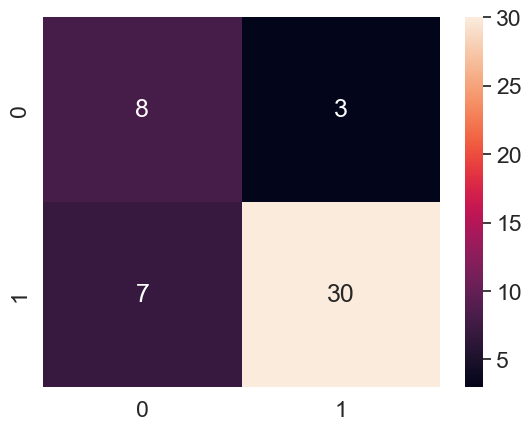

In [226]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
#prediction
y_pred = model1.predict(X_test)
#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [227]:
#Classificiation report and f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.53      0.62        15
           1       0.81      0.91      0.86        33

    accuracy                           0.79        48
   macro avg       0.77      0.72      0.74        48
weighted avg       0.78      0.79      0.78        48



In [228]:
#Decision tree classifier accuracy
from sklearn.metrics import accuracy_score
acc_dtc= accuracy_score(y_test, y_pred)
acc_dtc

0.7916666666666666

In [229]:
#2nd Model
# Define the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

# define a grid of parameters
param_grid = {'n_neighbors':[2,3,4,5,6,7,8],
              'weights':['uniform','distance'],
              'algorithm':['auto','ball_tree','kd_tree','brute'],
              'leaf_size':[26,27,28,29,30,31]
             }
# initialize grid search
model2 = GridSearchCV(
estimator=classifier, param_grid=param_grid, scoring="accuracy", verbose=10,
n_jobs=1,
cv=5 )

# fit the model and extract best score
model2.fit(X_train, y_train)

Fitting 5 folds for each of 336 candidates, totalling 1680 fits
[CV 1/5; 1/336] START algorithm=auto, leaf_size=26, n_neighbors=2, weights=uniform
[CV 1/5; 1/336] END algorithm=auto, leaf_size=26, n_neighbors=2, weights=uniform;, score=0.651 total time=   0.0s
[CV 2/5; 1/336] START algorithm=auto, leaf_size=26, n_neighbors=2, weights=uniform
[CV 2/5; 1/336] END algorithm=auto, leaf_size=26, n_neighbors=2, weights=uniform;, score=0.663 total time=   0.0s
[CV 3/5; 1/336] START algorithm=auto, leaf_size=26, n_neighbors=2, weights=uniform
[CV 3/5; 1/336] END algorithm=auto, leaf_size=26, n_neighbors=2, weights=uniform;, score=0.616 total time=   0.0s
[CV 4/5; 1/336] START algorithm=auto, leaf_size=26, n_neighbors=2, weights=uniform
[CV 4/5; 1/336] END algorithm=auto, leaf_size=26, n_neighbors=2, weights=uniform;, score=0.698 total time=   0.0s
[CV 5/5; 1/336] START algorithm=auto, leaf_size=26, n_neighbors=2, weights=uniform
[CV 5/5; 1/336] END algorithm=auto, leaf_size=26, n_neighbors=2, 

[CV 3/5; 13/336] END algorithm=auto, leaf_size=26, n_neighbors=8, weights=uniform;, score=0.733 total time=   0.0s
[CV 4/5; 13/336] START algorithm=auto, leaf_size=26, n_neighbors=8, weights=uniform
[CV 4/5; 13/336] END algorithm=auto, leaf_size=26, n_neighbors=8, weights=uniform;, score=0.849 total time=   0.0s
[CV 5/5; 13/336] START algorithm=auto, leaf_size=26, n_neighbors=8, weights=uniform
[CV 5/5; 13/336] END algorithm=auto, leaf_size=26, n_neighbors=8, weights=uniform;, score=0.765 total time=   0.0s
[CV 1/5; 14/336] START algorithm=auto, leaf_size=26, n_neighbors=8, weights=distance
[CV 1/5; 14/336] END algorithm=auto, leaf_size=26, n_neighbors=8, weights=distance;, score=0.837 total time=   0.0s
[CV 2/5; 14/336] START algorithm=auto, leaf_size=26, n_neighbors=8, weights=distance
[CV 2/5; 14/336] END algorithm=auto, leaf_size=26, n_neighbors=8, weights=distance;, score=0.837 total time=   0.0s
[CV 3/5; 14/336] START algorithm=auto, leaf_size=26, n_neighbors=8, weights=distance


[CV 5/5; 21/336] END algorithm=auto, leaf_size=27, n_neighbors=5, weights=uniform;, score=0.765 total time=   0.0s
[CV 1/5; 22/336] START algorithm=auto, leaf_size=27, n_neighbors=5, weights=distance
[CV 1/5; 22/336] END algorithm=auto, leaf_size=27, n_neighbors=5, weights=distance;, score=0.802 total time=   0.0s
[CV 2/5; 22/336] START algorithm=auto, leaf_size=27, n_neighbors=5, weights=distance
[CV 2/5; 22/336] END algorithm=auto, leaf_size=27, n_neighbors=5, weights=distance;, score=0.837 total time=   0.0s
[CV 3/5; 22/336] START algorithm=auto, leaf_size=27, n_neighbors=5, weights=distance
[CV 3/5; 22/336] END algorithm=auto, leaf_size=27, n_neighbors=5, weights=distance;, score=0.721 total time=   0.0s
[CV 4/5; 22/336] START algorithm=auto, leaf_size=27, n_neighbors=5, weights=distance
[CV 4/5; 22/336] END algorithm=auto, leaf_size=27, n_neighbors=5, weights=distance;, score=0.849 total time=   0.0s
[CV 5/5; 22/336] START algorithm=auto, leaf_size=27, n_neighbors=5, weights=dista

[CV 4/5; 30/336] END algorithm=auto, leaf_size=28, n_neighbors=2, weights=distance;, score=0.779 total time=   0.0s
[CV 5/5; 30/336] START algorithm=auto, leaf_size=28, n_neighbors=2, weights=distance
[CV 5/5; 30/336] END algorithm=auto, leaf_size=28, n_neighbors=2, weights=distance;, score=0.776 total time=   0.0s
[CV 1/5; 31/336] START algorithm=auto, leaf_size=28, n_neighbors=3, weights=uniform
[CV 1/5; 31/336] END algorithm=auto, leaf_size=28, n_neighbors=3, weights=uniform;, score=0.802 total time=   0.0s
[CV 2/5; 31/336] START algorithm=auto, leaf_size=28, n_neighbors=3, weights=uniform
[CV 2/5; 31/336] END algorithm=auto, leaf_size=28, n_neighbors=3, weights=uniform;, score=0.837 total time=   0.0s
[CV 3/5; 31/336] START algorithm=auto, leaf_size=28, n_neighbors=3, weights=uniform
[CV 3/5; 31/336] END algorithm=auto, leaf_size=28, n_neighbors=3, weights=uniform;, score=0.698 total time=   0.0s
[CV 4/5; 31/336] START algorithm=auto, leaf_size=28, n_neighbors=3, weights=uniform
[C

[CV 1/5; 39/336] END algorithm=auto, leaf_size=28, n_neighbors=7, weights=uniform;, score=0.837 total time=   0.0s
[CV 2/5; 39/336] START algorithm=auto, leaf_size=28, n_neighbors=7, weights=uniform
[CV 2/5; 39/336] END algorithm=auto, leaf_size=28, n_neighbors=7, weights=uniform;, score=0.837 total time=   0.0s
[CV 3/5; 39/336] START algorithm=auto, leaf_size=28, n_neighbors=7, weights=uniform
[CV 3/5; 39/336] END algorithm=auto, leaf_size=28, n_neighbors=7, weights=uniform;, score=0.744 total time=   0.0s
[CV 4/5; 39/336] START algorithm=auto, leaf_size=28, n_neighbors=7, weights=uniform
[CV 4/5; 39/336] END algorithm=auto, leaf_size=28, n_neighbors=7, weights=uniform;, score=0.860 total time=   0.0s
[CV 5/5; 39/336] START algorithm=auto, leaf_size=28, n_neighbors=7, weights=uniform
[CV 5/5; 39/336] END algorithm=auto, leaf_size=28, n_neighbors=7, weights=uniform;, score=0.765 total time=   0.0s
[CV 1/5; 40/336] START algorithm=auto, leaf_size=28, n_neighbors=7, weights=distance
[CV 

[CV 4/5; 47/336] END algorithm=auto, leaf_size=29, n_neighbors=4, weights=uniform;, score=0.849 total time=   0.0s
[CV 5/5; 47/336] START algorithm=auto, leaf_size=29, n_neighbors=4, weights=uniform
[CV 5/5; 47/336] END algorithm=auto, leaf_size=29, n_neighbors=4, weights=uniform;, score=0.718 total time=   0.0s
[CV 1/5; 48/336] START algorithm=auto, leaf_size=29, n_neighbors=4, weights=distance
[CV 1/5; 48/336] END algorithm=auto, leaf_size=29, n_neighbors=4, weights=distance;, score=0.802 total time=   0.0s
[CV 2/5; 48/336] START algorithm=auto, leaf_size=29, n_neighbors=4, weights=distance
[CV 2/5; 48/336] END algorithm=auto, leaf_size=29, n_neighbors=4, weights=distance;, score=0.814 total time=   0.0s
[CV 3/5; 48/336] START algorithm=auto, leaf_size=29, n_neighbors=4, weights=distance
[CV 3/5; 48/336] END algorithm=auto, leaf_size=29, n_neighbors=4, weights=distance;, score=0.733 total time=   0.0s
[CV 4/5; 48/336] START algorithm=auto, leaf_size=29, n_neighbors=4, weights=distanc

[CV 5/5; 63/336] END algorithm=auto, leaf_size=30, n_neighbors=5, weights=uniform;, score=0.765 total time=   0.0s
[CV 1/5; 64/336] START algorithm=auto, leaf_size=30, n_neighbors=5, weights=distance
[CV 1/5; 64/336] END algorithm=auto, leaf_size=30, n_neighbors=5, weights=distance;, score=0.802 total time=   0.0s
[CV 2/5; 64/336] START algorithm=auto, leaf_size=30, n_neighbors=5, weights=distance
[CV 2/5; 64/336] END algorithm=auto, leaf_size=30, n_neighbors=5, weights=distance;, score=0.837 total time=   0.0s
[CV 3/5; 64/336] START algorithm=auto, leaf_size=30, n_neighbors=5, weights=distance
[CV 3/5; 64/336] END algorithm=auto, leaf_size=30, n_neighbors=5, weights=distance;, score=0.721 total time=   0.0s
[CV 4/5; 64/336] START algorithm=auto, leaf_size=30, n_neighbors=5, weights=distance
[CV 4/5; 64/336] END algorithm=auto, leaf_size=30, n_neighbors=5, weights=distance;, score=0.849 total time=   0.0s
[CV 5/5; 64/336] START algorithm=auto, leaf_size=30, n_neighbors=5, weights=dista

[CV 3/5; 72/336] END algorithm=auto, leaf_size=31, n_neighbors=2, weights=distance;, score=0.698 total time=   0.0s
[CV 4/5; 72/336] START algorithm=auto, leaf_size=31, n_neighbors=2, weights=distance
[CV 4/5; 72/336] END algorithm=auto, leaf_size=31, n_neighbors=2, weights=distance;, score=0.779 total time=   0.0s
[CV 5/5; 72/336] START algorithm=auto, leaf_size=31, n_neighbors=2, weights=distance
[CV 5/5; 72/336] END algorithm=auto, leaf_size=31, n_neighbors=2, weights=distance;, score=0.776 total time=   0.0s
[CV 1/5; 73/336] START algorithm=auto, leaf_size=31, n_neighbors=3, weights=uniform
[CV 1/5; 73/336] END algorithm=auto, leaf_size=31, n_neighbors=3, weights=uniform;, score=0.802 total time=   0.0s
[CV 2/5; 73/336] START algorithm=auto, leaf_size=31, n_neighbors=3, weights=uniform
[CV 2/5; 73/336] END algorithm=auto, leaf_size=31, n_neighbors=3, weights=uniform;, score=0.837 total time=   0.0s
[CV 3/5; 73/336] START algorithm=auto, leaf_size=31, n_neighbors=3, weights=uniform


[CV 5/5; 87/336] END algorithm=ball_tree, leaf_size=26, n_neighbors=3, weights=uniform;, score=0.765 total time=   0.0s
[CV 1/5; 88/336] START algorithm=ball_tree, leaf_size=26, n_neighbors=3, weights=distance
[CV 1/5; 88/336] END algorithm=ball_tree, leaf_size=26, n_neighbors=3, weights=distance;, score=0.791 total time=   0.0s
[CV 2/5; 88/336] START algorithm=ball_tree, leaf_size=26, n_neighbors=3, weights=distance
[CV 2/5; 88/336] END algorithm=ball_tree, leaf_size=26, n_neighbors=3, weights=distance;, score=0.826 total time=   0.0s
[CV 3/5; 88/336] START algorithm=ball_tree, leaf_size=26, n_neighbors=3, weights=distance
[CV 3/5; 88/336] END algorithm=ball_tree, leaf_size=26, n_neighbors=3, weights=distance;, score=0.686 total time=   0.0s
[CV 4/5; 88/336] START algorithm=ball_tree, leaf_size=26, n_neighbors=3, weights=distance
[CV 4/5; 88/336] END algorithm=ball_tree, leaf_size=26, n_neighbors=3, weights=distance;, score=0.837 total time=   0.0s
[CV 5/5; 88/336] START algorithm=bal

[CV 1/5; 103/336] END algorithm=ball_tree, leaf_size=27, n_neighbors=4, weights=uniform;, score=0.779 total time=   0.0s
[CV 2/5; 103/336] START algorithm=ball_tree, leaf_size=27, n_neighbors=4, weights=uniform
[CV 2/5; 103/336] END algorithm=ball_tree, leaf_size=27, n_neighbors=4, weights=uniform;, score=0.826 total time=   0.0s
[CV 3/5; 103/336] START algorithm=ball_tree, leaf_size=27, n_neighbors=4, weights=uniform
[CV 3/5; 103/336] END algorithm=ball_tree, leaf_size=27, n_neighbors=4, weights=uniform;, score=0.698 total time=   0.0s
[CV 4/5; 103/336] START algorithm=ball_tree, leaf_size=27, n_neighbors=4, weights=uniform
[CV 4/5; 103/336] END algorithm=ball_tree, leaf_size=27, n_neighbors=4, weights=uniform;, score=0.849 total time=   0.0s
[CV 5/5; 103/336] START algorithm=ball_tree, leaf_size=27, n_neighbors=4, weights=uniform
[CV 5/5; 103/336] END algorithm=ball_tree, leaf_size=27, n_neighbors=4, weights=uniform;, score=0.718 total time=   0.0s
[CV 1/5; 104/336] START algorithm=b

[CV 2/5; 113/336] END algorithm=ball_tree, leaf_size=28, n_neighbors=2, weights=uniform;, score=0.663 total time=   0.0s
[CV 3/5; 113/336] START algorithm=ball_tree, leaf_size=28, n_neighbors=2, weights=uniform
[CV 3/5; 113/336] END algorithm=ball_tree, leaf_size=28, n_neighbors=2, weights=uniform;, score=0.616 total time=   0.0s
[CV 4/5; 113/336] START algorithm=ball_tree, leaf_size=28, n_neighbors=2, weights=uniform
[CV 4/5; 113/336] END algorithm=ball_tree, leaf_size=28, n_neighbors=2, weights=uniform;, score=0.698 total time=   0.0s
[CV 5/5; 113/336] START algorithm=ball_tree, leaf_size=28, n_neighbors=2, weights=uniform
[CV 5/5; 113/336] END algorithm=ball_tree, leaf_size=28, n_neighbors=2, weights=uniform;, score=0.647 total time=   0.0s
[CV 1/5; 114/336] START algorithm=ball_tree, leaf_size=28, n_neighbors=2, weights=distance
[CV 1/5; 114/336] END algorithm=ball_tree, leaf_size=28, n_neighbors=2, weights=distance;, score=0.721 total time=   0.0s
[CV 2/5; 114/336] START algorithm

[CV 5/5; 128/336] END algorithm=ball_tree, leaf_size=29, n_neighbors=2, weights=distance;, score=0.776 total time=   0.0s
[CV 1/5; 129/336] START algorithm=ball_tree, leaf_size=29, n_neighbors=3, weights=uniform
[CV 1/5; 129/336] END algorithm=ball_tree, leaf_size=29, n_neighbors=3, weights=uniform;, score=0.802 total time=   0.0s
[CV 2/5; 129/336] START algorithm=ball_tree, leaf_size=29, n_neighbors=3, weights=uniform
[CV 2/5; 129/336] END algorithm=ball_tree, leaf_size=29, n_neighbors=3, weights=uniform;, score=0.837 total time=   0.0s
[CV 3/5; 129/336] START algorithm=ball_tree, leaf_size=29, n_neighbors=3, weights=uniform
[CV 3/5; 129/336] END algorithm=ball_tree, leaf_size=29, n_neighbors=3, weights=uniform;, score=0.698 total time=   0.0s
[CV 4/5; 129/336] START algorithm=ball_tree, leaf_size=29, n_neighbors=3, weights=uniform
[CV 4/5; 129/336] END algorithm=ball_tree, leaf_size=29, n_neighbors=3, weights=uniform;, score=0.849 total time=   0.0s
[CV 5/5; 129/336] START algorithm=

[CV 2/5; 137/336] END algorithm=ball_tree, leaf_size=29, n_neighbors=7, weights=uniform;, score=0.837 total time=   0.0s
[CV 3/5; 137/336] START algorithm=ball_tree, leaf_size=29, n_neighbors=7, weights=uniform
[CV 3/5; 137/336] END algorithm=ball_tree, leaf_size=29, n_neighbors=7, weights=uniform;, score=0.744 total time=   0.0s
[CV 4/5; 137/336] START algorithm=ball_tree, leaf_size=29, n_neighbors=7, weights=uniform
[CV 4/5; 137/336] END algorithm=ball_tree, leaf_size=29, n_neighbors=7, weights=uniform;, score=0.860 total time=   0.0s
[CV 5/5; 137/336] START algorithm=ball_tree, leaf_size=29, n_neighbors=7, weights=uniform
[CV 5/5; 137/336] END algorithm=ball_tree, leaf_size=29, n_neighbors=7, weights=uniform;, score=0.765 total time=   0.0s
[CV 1/5; 138/336] START algorithm=ball_tree, leaf_size=29, n_neighbors=7, weights=distance
[CV 1/5; 138/336] END algorithm=ball_tree, leaf_size=29, n_neighbors=7, weights=distance;, score=0.826 total time=   0.0s
[CV 2/5; 138/336] START algorithm

[CV 4/5; 145/336] END algorithm=ball_tree, leaf_size=30, n_neighbors=4, weights=uniform;, score=0.849 total time=   0.0s
[CV 5/5; 145/336] START algorithm=ball_tree, leaf_size=30, n_neighbors=4, weights=uniform
[CV 5/5; 145/336] END algorithm=ball_tree, leaf_size=30, n_neighbors=4, weights=uniform;, score=0.718 total time=   0.0s
[CV 1/5; 146/336] START algorithm=ball_tree, leaf_size=30, n_neighbors=4, weights=distance
[CV 1/5; 146/336] END algorithm=ball_tree, leaf_size=30, n_neighbors=4, weights=distance;, score=0.802 total time=   0.0s
[CV 2/5; 146/336] START algorithm=ball_tree, leaf_size=30, n_neighbors=4, weights=distance
[CV 2/5; 146/336] END algorithm=ball_tree, leaf_size=30, n_neighbors=4, weights=distance;, score=0.814 total time=   0.0s
[CV 3/5; 146/336] START algorithm=ball_tree, leaf_size=30, n_neighbors=4, weights=distance
[CV 3/5; 146/336] END algorithm=ball_tree, leaf_size=30, n_neighbors=4, weights=distance;, score=0.733 total time=   0.0s
[CV 4/5; 146/336] START algor

[CV 5/5; 154/336] END algorithm=ball_tree, leaf_size=30, n_neighbors=8, weights=distance;, score=0.776 total time=   0.0s
[CV 1/5; 155/336] START algorithm=ball_tree, leaf_size=31, n_neighbors=2, weights=uniform
[CV 1/5; 155/336] END algorithm=ball_tree, leaf_size=31, n_neighbors=2, weights=uniform;, score=0.651 total time=   0.0s
[CV 2/5; 155/336] START algorithm=ball_tree, leaf_size=31, n_neighbors=2, weights=uniform
[CV 2/5; 155/336] END algorithm=ball_tree, leaf_size=31, n_neighbors=2, weights=uniform;, score=0.663 total time=   0.0s
[CV 3/5; 155/336] START algorithm=ball_tree, leaf_size=31, n_neighbors=2, weights=uniform
[CV 3/5; 155/336] END algorithm=ball_tree, leaf_size=31, n_neighbors=2, weights=uniform;, score=0.616 total time=   0.0s
[CV 4/5; 155/336] START algorithm=ball_tree, leaf_size=31, n_neighbors=2, weights=uniform
[CV 4/5; 155/336] END algorithm=ball_tree, leaf_size=31, n_neighbors=2, weights=uniform;, score=0.698 total time=   0.0s
[CV 5/5; 155/336] START algorithm=

[CV 1/5; 163/336] END algorithm=ball_tree, leaf_size=31, n_neighbors=6, weights=uniform;, score=0.791 total time=   0.0s
[CV 2/5; 163/336] START algorithm=ball_tree, leaf_size=31, n_neighbors=6, weights=uniform
[CV 2/5; 163/336] END algorithm=ball_tree, leaf_size=31, n_neighbors=6, weights=uniform;, score=0.837 total time=   0.0s
[CV 3/5; 163/336] START algorithm=ball_tree, leaf_size=31, n_neighbors=6, weights=uniform
[CV 3/5; 163/336] END algorithm=ball_tree, leaf_size=31, n_neighbors=6, weights=uniform;, score=0.744 total time=   0.0s
[CV 4/5; 163/336] START algorithm=ball_tree, leaf_size=31, n_neighbors=6, weights=uniform
[CV 4/5; 163/336] END algorithm=ball_tree, leaf_size=31, n_neighbors=6, weights=uniform;, score=0.802 total time=   0.0s
[CV 5/5; 163/336] START algorithm=ball_tree, leaf_size=31, n_neighbors=6, weights=uniform
[CV 5/5; 163/336] END algorithm=ball_tree, leaf_size=31, n_neighbors=6, weights=uniform;, score=0.753 total time=   0.0s
[CV 1/5; 164/336] START algorithm=b

[CV 1/5; 178/336] END algorithm=kd_tree, leaf_size=26, n_neighbors=6, weights=distance;, score=0.814 total time=   0.0s
[CV 2/5; 178/336] START algorithm=kd_tree, leaf_size=26, n_neighbors=6, weights=distance
[CV 2/5; 178/336] END algorithm=kd_tree, leaf_size=26, n_neighbors=6, weights=distance;, score=0.837 total time=   0.0s
[CV 3/5; 178/336] START algorithm=kd_tree, leaf_size=26, n_neighbors=6, weights=distance
[CV 3/5; 178/336] END algorithm=kd_tree, leaf_size=26, n_neighbors=6, weights=distance;, score=0.709 total time=   0.0s
[CV 4/5; 178/336] START algorithm=kd_tree, leaf_size=26, n_neighbors=6, weights=distance
[CV 4/5; 178/336] END algorithm=kd_tree, leaf_size=26, n_neighbors=6, weights=distance;, score=0.860 total time=   0.0s
[CV 5/5; 178/336] START algorithm=kd_tree, leaf_size=26, n_neighbors=6, weights=distance
[CV 5/5; 178/336] END algorithm=kd_tree, leaf_size=26, n_neighbors=6, weights=distance;, score=0.776 total time=   0.0s
[CV 1/5; 179/336] START algorithm=kd_tree, l

[CV 5/5; 191/336] END algorithm=kd_tree, leaf_size=27, n_neighbors=6, weights=uniform;, score=0.753 total time=   0.0s
[CV 1/5; 192/336] START algorithm=kd_tree, leaf_size=27, n_neighbors=6, weights=distance
[CV 1/5; 192/336] END algorithm=kd_tree, leaf_size=27, n_neighbors=6, weights=distance;, score=0.814 total time=   0.0s
[CV 2/5; 192/336] START algorithm=kd_tree, leaf_size=27, n_neighbors=6, weights=distance
[CV 2/5; 192/336] END algorithm=kd_tree, leaf_size=27, n_neighbors=6, weights=distance;, score=0.837 total time=   0.0s
[CV 3/5; 192/336] START algorithm=kd_tree, leaf_size=27, n_neighbors=6, weights=distance
[CV 3/5; 192/336] END algorithm=kd_tree, leaf_size=27, n_neighbors=6, weights=distance;, score=0.709 total time=   0.0s
[CV 4/5; 192/336] START algorithm=kd_tree, leaf_size=27, n_neighbors=6, weights=distance
[CV 4/5; 192/336] END algorithm=kd_tree, leaf_size=27, n_neighbors=6, weights=distance;, score=0.860 total time=   0.0s
[CV 5/5; 192/336] START algorithm=kd_tree, le

[CV 4/5; 200/336] END algorithm=kd_tree, leaf_size=28, n_neighbors=3, weights=distance;, score=0.837 total time=   0.0s
[CV 5/5; 200/336] START algorithm=kd_tree, leaf_size=28, n_neighbors=3, weights=distance
[CV 5/5; 200/336] END algorithm=kd_tree, leaf_size=28, n_neighbors=3, weights=distance;, score=0.776 total time=   0.0s
[CV 1/5; 201/336] START algorithm=kd_tree, leaf_size=28, n_neighbors=4, weights=uniform
[CV 1/5; 201/336] END algorithm=kd_tree, leaf_size=28, n_neighbors=4, weights=uniform;, score=0.779 total time=   0.0s
[CV 2/5; 201/336] START algorithm=kd_tree, leaf_size=28, n_neighbors=4, weights=uniform
[CV 2/5; 201/336] END algorithm=kd_tree, leaf_size=28, n_neighbors=4, weights=uniform;, score=0.826 total time=   0.0s
[CV 3/5; 201/336] START algorithm=kd_tree, leaf_size=28, n_neighbors=4, weights=uniform
[CV 3/5; 201/336] END algorithm=kd_tree, leaf_size=28, n_neighbors=4, weights=uniform;, score=0.698 total time=   0.0s
[CV 4/5; 201/336] START algorithm=kd_tree, leaf_si

[CV 1/5; 217/336] END algorithm=kd_tree, leaf_size=29, n_neighbors=5, weights=uniform;, score=0.814 total time=   0.0s
[CV 2/5; 217/336] START algorithm=kd_tree, leaf_size=29, n_neighbors=5, weights=uniform
[CV 2/5; 217/336] END algorithm=kd_tree, leaf_size=29, n_neighbors=5, weights=uniform;, score=0.837 total time=   0.0s
[CV 3/5; 217/336] START algorithm=kd_tree, leaf_size=29, n_neighbors=5, weights=uniform
[CV 3/5; 217/336] END algorithm=kd_tree, leaf_size=29, n_neighbors=5, weights=uniform;, score=0.733 total time=   0.0s
[CV 4/5; 217/336] START algorithm=kd_tree, leaf_size=29, n_neighbors=5, weights=uniform
[CV 4/5; 217/336] END algorithm=kd_tree, leaf_size=29, n_neighbors=5, weights=uniform;, score=0.837 total time=   0.0s
[CV 5/5; 217/336] START algorithm=kd_tree, leaf_size=29, n_neighbors=5, weights=uniform
[CV 5/5; 217/336] END algorithm=kd_tree, leaf_size=29, n_neighbors=5, weights=uniform;, score=0.765 total time=   0.0s
[CV 1/5; 218/336] START algorithm=kd_tree, leaf_size=

[CV 2/5; 229/336] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, weights=uniform;, score=0.826 total time=   0.0s
[CV 3/5; 229/336] START algorithm=kd_tree, leaf_size=30, n_neighbors=4, weights=uniform
[CV 3/5; 229/336] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, weights=uniform;, score=0.698 total time=   0.0s
[CV 4/5; 229/336] START algorithm=kd_tree, leaf_size=30, n_neighbors=4, weights=uniform
[CV 4/5; 229/336] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, weights=uniform;, score=0.849 total time=   0.0s
[CV 5/5; 229/336] START algorithm=kd_tree, leaf_size=30, n_neighbors=4, weights=uniform
[CV 5/5; 229/336] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, weights=uniform;, score=0.718 total time=   0.0s
[CV 1/5; 230/336] START algorithm=kd_tree, leaf_size=30, n_neighbors=4, weights=distance
[CV 1/5; 230/336] END algorithm=kd_tree, leaf_size=30, n_neighbors=4, weights=distance;, score=0.802 total time=   0.0s
[CV 2/5; 230/336] START algorithm=kd_tree, leaf_siz

[CV 2/5; 245/336] END algorithm=kd_tree, leaf_size=31, n_neighbors=5, weights=uniform;, score=0.837 total time=   0.0s
[CV 3/5; 245/336] START algorithm=kd_tree, leaf_size=31, n_neighbors=5, weights=uniform
[CV 3/5; 245/336] END algorithm=kd_tree, leaf_size=31, n_neighbors=5, weights=uniform;, score=0.733 total time=   0.0s
[CV 4/5; 245/336] START algorithm=kd_tree, leaf_size=31, n_neighbors=5, weights=uniform
[CV 4/5; 245/336] END algorithm=kd_tree, leaf_size=31, n_neighbors=5, weights=uniform;, score=0.837 total time=   0.0s
[CV 5/5; 245/336] START algorithm=kd_tree, leaf_size=31, n_neighbors=5, weights=uniform
[CV 5/5; 245/336] END algorithm=kd_tree, leaf_size=31, n_neighbors=5, weights=uniform;, score=0.765 total time=   0.0s
[CV 1/5; 246/336] START algorithm=kd_tree, leaf_size=31, n_neighbors=5, weights=distance
[CV 1/5; 246/336] END algorithm=kd_tree, leaf_size=31, n_neighbors=5, weights=distance;, score=0.802 total time=   0.0s
[CV 2/5; 246/336] START algorithm=kd_tree, leaf_siz

[CV 3/5; 254/336] END algorithm=brute, leaf_size=26, n_neighbors=2, weights=distance;, score=nan total time=   0.0s
[CV 4/5; 254/336] START algorithm=brute, leaf_size=26, n_neighbors=2, weights=distance
[CV 4/5; 254/336] END algorithm=brute, leaf_size=26, n_neighbors=2, weights=distance;, score=nan total time=   0.0s
[CV 5/5; 254/336] START algorithm=brute, leaf_size=26, n_neighbors=2, weights=distance
[CV 5/5; 254/336] END algorithm=brute, leaf_size=26, n_neighbors=2, weights=distance;, score=nan total time=   0.0s
[CV 1/5; 255/336] START algorithm=brute, leaf_size=26, n_neighbors=3, weights=uniform
[CV 1/5; 255/336] END algorithm=brute, leaf_size=26, n_neighbors=3, weights=uniform;, score=nan total time=   0.0s
[CV 2/5; 255/336] START algorithm=brute, leaf_size=26, n_neighbors=3, weights=uniform
[CV 2/5; 255/336] END algorithm=brute, leaf_size=26, n_neighbors=3, weights=uniform;, score=nan total time=   0.0s
[CV 3/5; 255/336] START algorithm=brute, leaf_size=26, n_neighbors=3, weight

[CV 4/5; 262/336] END algorithm=brute, leaf_size=26, n_neighbors=6, weights=distance;, score=nan total time=   0.0s
[CV 5/5; 262/336] START algorithm=brute, leaf_size=26, n_neighbors=6, weights=distance
[CV 5/5; 262/336] END algorithm=brute, leaf_size=26, n_neighbors=6, weights=distance;, score=nan total time=   0.0s
[CV 1/5; 263/336] START algorithm=brute, leaf_size=26, n_neighbors=7, weights=uniform
[CV 1/5; 263/336] END algorithm=brute, leaf_size=26, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 2/5; 263/336] START algorithm=brute, leaf_size=26, n_neighbors=7, weights=uniform
[CV 2/5; 263/336] END algorithm=brute, leaf_size=26, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 3/5; 263/336] START algorithm=brute, leaf_size=26, n_neighbors=7, weights=uniform
[CV 3/5; 263/336] END algorithm=brute, leaf_size=26, n_neighbors=7, weights=uniform;, score=nan total time=   0.0s
[CV 4/5; 263/336] START algorithm=brute, leaf_size=26, n_neighbors=7, weights=

[CV 3/5; 273/336] END algorithm=brute, leaf_size=27, n_neighbors=5, weights=uniform;, score=nan total time=   0.0s
[CV 4/5; 273/336] START algorithm=brute, leaf_size=27, n_neighbors=5, weights=uniform
[CV 4/5; 273/336] END algorithm=brute, leaf_size=27, n_neighbors=5, weights=uniform;, score=nan total time=   0.0s
[CV 5/5; 273/336] START algorithm=brute, leaf_size=27, n_neighbors=5, weights=uniform
[CV 5/5; 273/336] END algorithm=brute, leaf_size=27, n_neighbors=5, weights=uniform;, score=nan total time=   0.0s
[CV 1/5; 274/336] START algorithm=brute, leaf_size=27, n_neighbors=5, weights=distance
[CV 1/5; 274/336] END algorithm=brute, leaf_size=27, n_neighbors=5, weights=distance;, score=nan total time=   0.0s
[CV 2/5; 274/336] START algorithm=brute, leaf_size=27, n_neighbors=5, weights=distance
[CV 2/5; 274/336] END algorithm=brute, leaf_size=27, n_neighbors=5, weights=distance;, score=nan total time=   0.0s
[CV 3/5; 274/336] START algorithm=brute, leaf_size=27, n_neighbors=5, weights

[CV 5/5; 281/336] END algorithm=brute, leaf_size=28, n_neighbors=2, weights=uniform;, score=nan total time=   0.0s
[CV 1/5; 282/336] START algorithm=brute, leaf_size=28, n_neighbors=2, weights=distance
[CV 1/5; 282/336] END algorithm=brute, leaf_size=28, n_neighbors=2, weights=distance;, score=nan total time=   0.0s
[CV 2/5; 282/336] START algorithm=brute, leaf_size=28, n_neighbors=2, weights=distance
[CV 2/5; 282/336] END algorithm=brute, leaf_size=28, n_neighbors=2, weights=distance;, score=nan total time=   0.0s
[CV 3/5; 282/336] START algorithm=brute, leaf_size=28, n_neighbors=2, weights=distance
[CV 3/5; 282/336] END algorithm=brute, leaf_size=28, n_neighbors=2, weights=distance;, score=nan total time=   0.0s
[CV 4/5; 282/336] START algorithm=brute, leaf_size=28, n_neighbors=2, weights=distance
[CV 4/5; 282/336] END algorithm=brute, leaf_size=28, n_neighbors=2, weights=distance;, score=nan total time=   0.0s
[CV 5/5; 282/336] START algorithm=brute, leaf_size=28, n_neighbors=2, wei

[CV 2/5; 292/336] END algorithm=brute, leaf_size=28, n_neighbors=7, weights=distance;, score=nan total time=   0.0s
[CV 3/5; 292/336] START algorithm=brute, leaf_size=28, n_neighbors=7, weights=distance
[CV 3/5; 292/336] END algorithm=brute, leaf_size=28, n_neighbors=7, weights=distance;, score=nan total time=   0.0s
[CV 4/5; 292/336] START algorithm=brute, leaf_size=28, n_neighbors=7, weights=distance
[CV 4/5; 292/336] END algorithm=brute, leaf_size=28, n_neighbors=7, weights=distance;, score=nan total time=   0.0s
[CV 5/5; 292/336] START algorithm=brute, leaf_size=28, n_neighbors=7, weights=distance
[CV 5/5; 292/336] END algorithm=brute, leaf_size=28, n_neighbors=7, weights=distance;, score=nan total time=   0.0s
[CV 1/5; 293/336] START algorithm=brute, leaf_size=28, n_neighbors=8, weights=uniform
[CV 1/5; 293/336] END algorithm=brute, leaf_size=28, n_neighbors=8, weights=uniform;, score=nan total time=   0.0s
[CV 2/5; 293/336] START algorithm=brute, leaf_size=28, n_neighbors=8, weig

[CV 5/5; 302/336] END algorithm=brute, leaf_size=29, n_neighbors=5, weights=distance;, score=nan total time=   0.0s
[CV 1/5; 303/336] START algorithm=brute, leaf_size=29, n_neighbors=6, weights=uniform
[CV 1/5; 303/336] END algorithm=brute, leaf_size=29, n_neighbors=6, weights=uniform;, score=nan total time=   0.0s
[CV 2/5; 303/336] START algorithm=brute, leaf_size=29, n_neighbors=6, weights=uniform
[CV 2/5; 303/336] END algorithm=brute, leaf_size=29, n_neighbors=6, weights=uniform;, score=nan total time=   0.0s
[CV 3/5; 303/336] START algorithm=brute, leaf_size=29, n_neighbors=6, weights=uniform
[CV 3/5; 303/336] END algorithm=brute, leaf_size=29, n_neighbors=6, weights=uniform;, score=nan total time=   0.0s
[CV 4/5; 303/336] START algorithm=brute, leaf_size=29, n_neighbors=6, weights=uniform
[CV 4/5; 303/336] END algorithm=brute, leaf_size=29, n_neighbors=6, weights=uniform;, score=nan total time=   0.0s
[CV 5/5; 303/336] START algorithm=brute, leaf_size=29, n_neighbors=6, weights=un

[CV 3/5; 313/336] END algorithm=brute, leaf_size=30, n_neighbors=4, weights=uniform;, score=nan total time=   0.0s
[CV 4/5; 313/336] START algorithm=brute, leaf_size=30, n_neighbors=4, weights=uniform
[CV 4/5; 313/336] END algorithm=brute, leaf_size=30, n_neighbors=4, weights=uniform;, score=nan total time=   0.0s
[CV 5/5; 313/336] START algorithm=brute, leaf_size=30, n_neighbors=4, weights=uniform
[CV 5/5; 313/336] END algorithm=brute, leaf_size=30, n_neighbors=4, weights=uniform;, score=nan total time=   0.0s
[CV 1/5; 314/336] START algorithm=brute, leaf_size=30, n_neighbors=4, weights=distance
[CV 1/5; 314/336] END algorithm=brute, leaf_size=30, n_neighbors=4, weights=distance;, score=nan total time=   0.0s
[CV 2/5; 314/336] START algorithm=brute, leaf_size=30, n_neighbors=4, weights=distance
[CV 2/5; 314/336] END algorithm=brute, leaf_size=30, n_neighbors=4, weights=distance;, score=nan total time=   0.0s
[CV 3/5; 314/336] START algorithm=brute, leaf_size=30, n_neighbors=4, weights

[CV 2/5; 324/336] END algorithm=brute, leaf_size=31, n_neighbors=2, weights=distance;, score=nan total time=   0.0s
[CV 3/5; 324/336] START algorithm=brute, leaf_size=31, n_neighbors=2, weights=distance
[CV 3/5; 324/336] END algorithm=brute, leaf_size=31, n_neighbors=2, weights=distance;, score=nan total time=   0.0s
[CV 4/5; 324/336] START algorithm=brute, leaf_size=31, n_neighbors=2, weights=distance
[CV 4/5; 324/336] END algorithm=brute, leaf_size=31, n_neighbors=2, weights=distance;, score=nan total time=   0.0s
[CV 5/5; 324/336] START algorithm=brute, leaf_size=31, n_neighbors=2, weights=distance
[CV 5/5; 324/336] END algorithm=brute, leaf_size=31, n_neighbors=2, weights=distance;, score=nan total time=   0.0s
[CV 1/5; 325/336] START algorithm=brute, leaf_size=31, n_neighbors=3, weights=uniform
[CV 1/5; 325/336] END algorithm=brute, leaf_size=31, n_neighbors=3, weights=uniform;, score=nan total time=   0.0s
[CV 2/5; 325/336] START algorithm=brute, leaf_size=31, n_neighbors=3, weig

[CV 4/5; 334/336] END algorithm=brute, leaf_size=31, n_neighbors=7, weights=distance;, score=nan total time=   0.0s
[CV 5/5; 334/336] START algorithm=brute, leaf_size=31, n_neighbors=7, weights=distance
[CV 5/5; 334/336] END algorithm=brute, leaf_size=31, n_neighbors=7, weights=distance;, score=nan total time=   0.0s
[CV 1/5; 335/336] START algorithm=brute, leaf_size=31, n_neighbors=8, weights=uniform
[CV 1/5; 335/336] END algorithm=brute, leaf_size=31, n_neighbors=8, weights=uniform;, score=nan total time=   0.0s
[CV 2/5; 335/336] START algorithm=brute, leaf_size=31, n_neighbors=8, weights=uniform
[CV 2/5; 335/336] END algorithm=brute, leaf_size=31, n_neighbors=8, weights=uniform;, score=nan total time=   0.0s
[CV 3/5; 335/336] START algorithm=brute, leaf_size=31, n_neighbors=8, weights=uniform
[CV 3/5; 335/336] END algorithm=brute, leaf_size=31, n_neighbors=8, weights=uniform;, score=nan total time=   0.0s
[CV 4/5; 335/336] START algorithm=brute, leaf_size=31, n_neighbors=8, weights=

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [26, 27, 28, 29, 30, 31],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=10)

In [230]:
print(f"{colored('K Neighbors Classifier', 'blue')}")
print(f"Best score : {colored(model2.best_score_,'yellow')}")

print("Best parameters set:")
best_parameters = model2.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print(f"\t{param_name}: {colored(best_parameters[param_name],'yellow')}")

K Neighbors Classifier
Best score : 0.8087551299589603
Best parameters set:
	algorithm: auto
	leaf_size: 26
	n_neighbors: 7
	weights: uniform


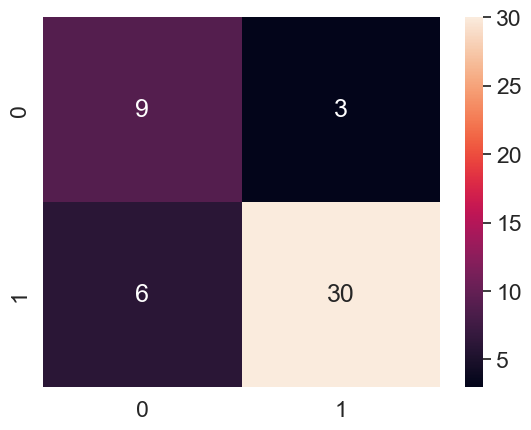

In [231]:
#Confusion Matrix

#prediction
b_pred = model2.predict(X_test)
#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(b_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [232]:
print(classification_report(y_test, b_pred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        15
           1       0.83      0.91      0.87        33

    accuracy                           0.81        48
   macro avg       0.79      0.75      0.77        48
weighted avg       0.81      0.81      0.81        48



In [233]:
acc_knn= accuracy_score(y_test, b_pred)
acc_knn

0.8125

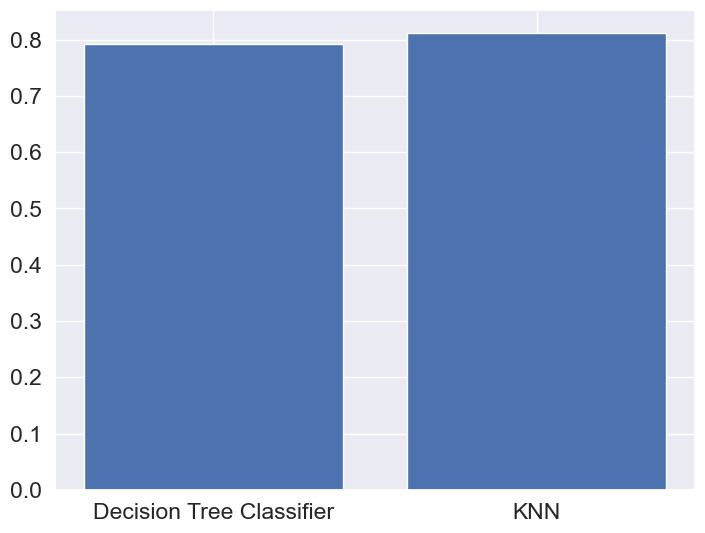

In [234]:
#Comparing the accuracy of both models using bar-chart
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ['Decision Tree Classifier', 'KNN']
Accuracy = [acc_dtc,acc_knn]
ax.bar(Models,Accuracy)
plt.show()

In [235]:
x = [ [0.414, 2.177, 1.253, 0.866, 0.276, 2.178] ]

nmp=np.array(x)

In [236]:
def user_input(a,b,c,d,e,f):
  data = {
    'credit_history' : a,
    'loan_amount' : b,
    'ApplicantIncome' : c,
    'CoapplicantIncome' : d,
    'Loan_Amount_Term' : e,
    'Dependents' : f
         }
  parametres_pret =pd.DataFrame(data,index=[0])
  return parametres_pret

df=user_input(0.414, 2.177, 1.253, 0.866, 0.276, 2.178)

In [237]:
df

,credit_history,loan_amount,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Dependents
0,0.414,2.177,1.253,0.866,0.276,2.178


In [238]:
nmp=df.to_numpy()

In [239]:
nmp.shape

(1, 6)

In [240]:
#Since DTC model has higher accuracy, we are going to use this model for prediction
#Over here the values of a certain row from the validation table are needed to be input to test the model. 
result = model1.predict(nmp) #For the input, the values of the features are inserted over here.
print("Should a loan be given to this customer?")
if result == [1]:
    print("Yes")
else: 
  print("No")

Should a loan be given to this customer?
No


In [166]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [241]:
# récupérer le fichier du modele entrainé et celui du victor 
import warnings
import pickle
warnings.filterwarnings("ignore")
pickle.dump(model1,open('model1.pkl','wb'))
model=pickle.load(open('model1.pkl','rb'))




In [242]:
f_scaled = scaler.transform([[1,133,4887,0,360,0


]])

In [243]:
f_scaled

array([[ 0.41471698, -0.14583982, -0.08786652, -0.79590331,  0.27647271,
        -0.76239386]])

In [244]:
result = model.predict(f_scaled ) #For the input, the values of the features are inserted over here.
print("Should a loan be given to this customer?")
if result == [1]:
    print("Yes")
else: 
  print("No")

Should a loan be given to this customer?
Yes
